# Convolutional Neural Networks

Convolutional Neural Networks (CNNs) are specialized architectures in deep learning designed for processing grid-structured data, such as images. 

The following example illustrates how a basic implementation, as provided by class `SimpleCNN`, leverages essential components, such as convolutional layers, activation functions, pooling, and a simple fully connected layer, for classification tasks. 

Please note that this is a from-scratch implementation to illustrate the fundamental concepts. In practice, libraries like TensorFlow or PyTorch are recommended for efficiency and scalability.

Epoch 1/100 completed.
Epoch 2/100 completed.
Epoch 3/100 completed.
Epoch 4/100 completed.
Epoch 5/100 completed.
Epoch 6/100 completed.
Epoch 7/100 completed.
Epoch 8/100 completed.
Epoch 9/100 completed.
Epoch 10/100 completed.
Epoch 11/100 completed.
Epoch 12/100 completed.
Epoch 13/100 completed.
Epoch 14/100 completed.
Epoch 15/100 completed.
Epoch 16/100 completed.
Epoch 17/100 completed.
Epoch 18/100 completed.
Epoch 19/100 completed.
Epoch 20/100 completed.
Epoch 21/100 completed.
Epoch 22/100 completed.
Epoch 23/100 completed.
Epoch 24/100 completed.
Epoch 25/100 completed.
Epoch 26/100 completed.
Epoch 27/100 completed.
Epoch 28/100 completed.
Epoch 29/100 completed.
Epoch 30/100 completed.
Epoch 31/100 completed.
Epoch 32/100 completed.
Epoch 33/100 completed.
Epoch 34/100 completed.
Epoch 35/100 completed.
Epoch 36/100 completed.
Epoch 37/100 completed.
Epoch 38/100 completed.
Epoch 39/100 completed.
Epoch 40/100 completed.
Epoch 41/100 completed.
Epoch 42/100 completed.
E

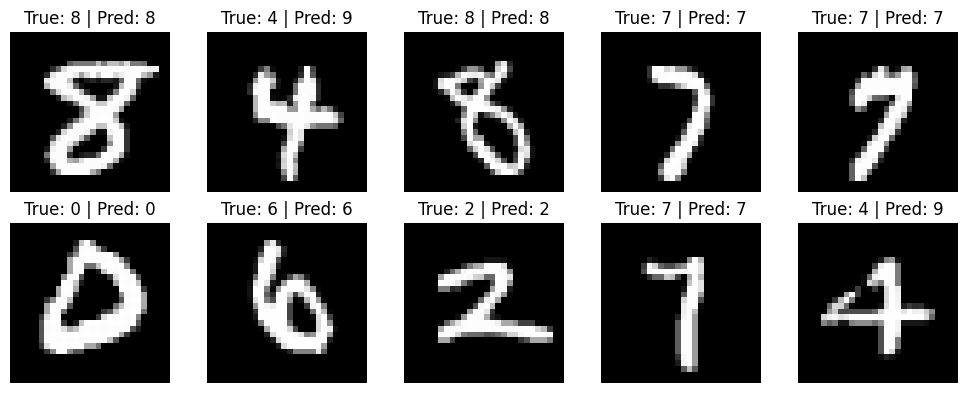

In [46]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from SimpleCNN import SimpleCNN

# Loading MNIST dataset.
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.to_numpy().reshape(-1, 28, 28).astype('float32') / 255.0  # Normalize to [0, 1]
y = mnist.target.to_numpy().astype('int')

# Splitting into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For this demonstration, let's use a small subset to avoid long training times.
X_train_small = X_train[:100]
y_train_small = y_train[:100]
X_test_small = X_test[:10]
y_test_small = y_test[:10]

# Instantiating and training the CNN:
# - num_filters: Number of convolution filters for detecting features.
# - filter_size: Size of filter kernels (e.g., 5x5 pixels).
# - pool_size: Pooling window size for downsampling features.
# - hidden_size: Neurons in the hidden dense layer.
# - output_size: Number of output classes for classification.
# - input_shape: Input image height and width.
cnn = SimpleCNN(num_filters=16, filter_size=4, pool_size=4, hidden_size=512, output_size=10, input_shape=(28, 28))
cnn.train(X_train_small, y_train_small, epochs=100, learning_rate=0.01)

# Making predictions on the test subset.
predictions = []

for x in X_test_small:
    pred = cnn.predict(x)
    predictions.append(pred[0])

# Calculating the accuracy of the model.
accuracy = np.mean(np.array(predictions) == y_test_small) * 100
print(f"Model Accuracy on Test Subset: {accuracy:.2f}%")

# Rendering the test images with predictions.
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()

for i in range(len(X_test_small)):
    axes[i].imshow(X_test_small[i], cmap='gray')
    axes[i].set_title(f"True: {y_test_small[i]} | Pred: {predictions[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()